In [101]:
import bmxobs
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
from scipy.ndimage import gaussian_filter1d

In [49]:
da=bmxobs.BMXObs("pas/201021_2000",channels='440,441')


In [50]:
l=len(d)//32*32
d=np.copy(da.data[440])[:l,:]
t1=da.temp['fgpa'][:l,1]
t2=da.temp['adc'][:l,1]
t3=da.temp['frontend'][:l,1]

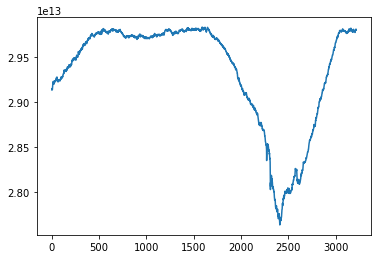

In [51]:
dm=d.mean(axis=1).reshape(-1,32).mean(axis=1)
plt.plot(dm)

In [61]:
s,e=0,5000
t1m=t1.reshape((-1,32)).mean(axis=1)[s:e]
t2m=t2.reshape((-1,32)).mean(axis=1)[s:e]
t3m=t3.reshape((-1,32)).mean(axis=1)[s:e]
dm=d.mean(axis=1).reshape(-1,32).mean(axis=1)[s:e]

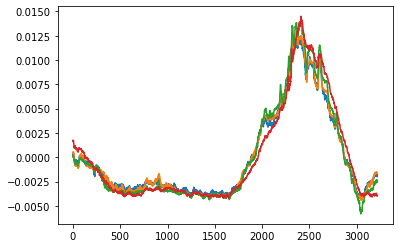

In [71]:
t1md = t1m/t1m.mean()-1
t2md = t2m/t2m.mean()-1
t3md = t3m/t3m.mean()-1
dmd = dm/dm.mean()-1
plt.plot(t1md)
plt.plot(t2md)
plt.plot(t3md)
plt.plot(-dmd/4)

In [78]:
## let's find the best linear combination that explains the data.
X= [t1md,t2md,t3md]
Y = dmd
N = len(X)
M1 = np.array([[(v1*v2).mean() for v1 in X] for v2 in X])
M2 = np.array([(v1*Y).mean() for v1 in X])
w1,w2,w3 = np.dot(la.inv(M1),M2)
corr = (w1*t1md+w2*t2md+w3*t3md)

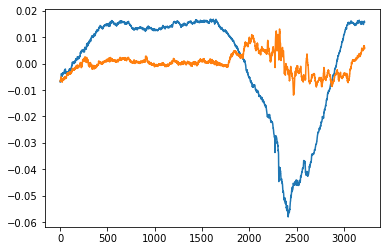

In [84]:
plt.plot(dmd)
plt.plot(dmd-corr)

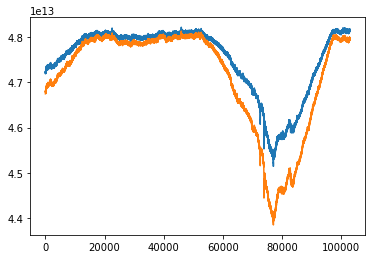

In [100]:
plt.plot(d[:,10:100].mean(axis=1))
plt.plot(d[:,1410:1500].mean(axis=1)*3.35)

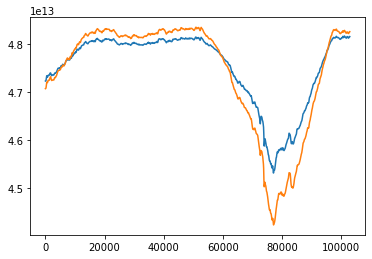

In [107]:
x1=gaussian_filter1d(d[:,10:100].mean(axis=1),64)
x2=gaussian_filter1d(d[:,1410:1500].mean(axis=1),64)
plt.plot(x1)
plt.plot(x2*3.37)

In [152]:
## let's try to explain each freqeuncy with a linear combination of x1, x2
s,e=0000,160000
M1i = la.inv(np.array([[(v1*v2).mean() for v1 in [x1[s:e],x2[s:e]]] for v2 in [x1[s:e],x2[s:e]]]))
outa=[]
for i in range(d.shape[1]):
    w1,w2 = np.dot(M1i,[(x1[s:e]*d[s:e,i]).mean(),(x2[s:e]*d[s:e,i]).mean()])
    #print (w1,w2)
    outa.append(w1*x1+w2*x2)
outa=np.array(outa).T

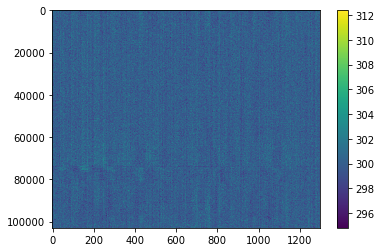

In [153]:
dd = (d/outa*300)[:,100:1400]
plt.imshow(dd,aspect='auto')
plt.colorbar()

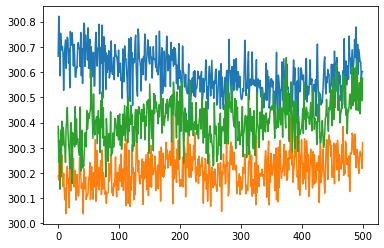

In [162]:
dd = (d/outa*300)[10000:60000,100:1400]
plt.plot(dd[:,300].reshape((-1,100)).mean(axis=1))
plt.plot(dd[:,600].reshape((-1,100)).mean(axis=1))
plt.plot(dd[:,900].reshape((-1,100)).mean(axis=1))

(1300, 51489)


[]

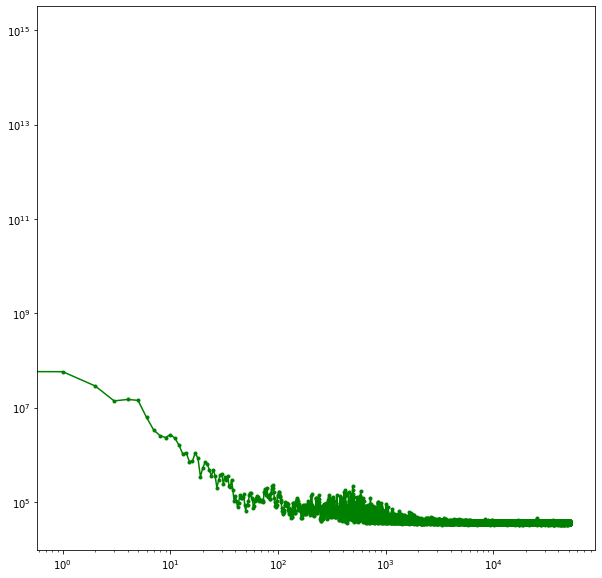

In [182]:
from numpy.fft import rfft
plt.figure(figsize=(10,10))
dd = (d/outa*300)[:,100:1400]
xx = np.array([abs(rfft(xx)**2) for xx in dd.T])
print (xx.shape)
plt.plot(xx.mean(axis=0),'g.-')
plt.loglog()